# Домашнее задание: Кластеризация K-Means

## 1. Загрузка данных и предварительная обработка

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
import joblib

# Загрузка данных
df = pd.read_csv("penguins.csv")

# Обработка пропущенных значений
imputer = SimpleImputer(strategy="median")
df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])

# Кодирование категориального признака 'sex'
df = pd.get_dummies(df, columns=['sex'], drop_first=True)

# Масштабирование данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Вывод первых строк обработанных данных
df.head()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.10,18.7,181.0,3750.0,False,True
1,39.50,17.4,186.0,3800.0,True,False
2,40.30,18.0,195.0,3250.0,True,False
3,44.45,17.3,197.0,4050.0,False,False
4,36.70,19.3,193.0,3450.0,True,False


## 2. Метод локтя для выбора числа кластеров

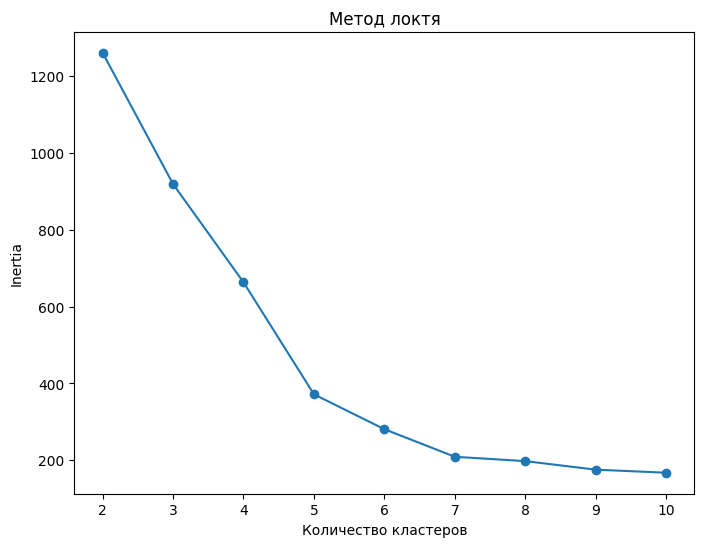

In [2]:

# Метод локтя
inertia = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Визуализация метода локтя
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel("Количество кластеров")
plt.ylabel("Inertia")
plt.title("Метод локтя")
plt.show()


## 3. Метод силуэта для оценки кластеризации

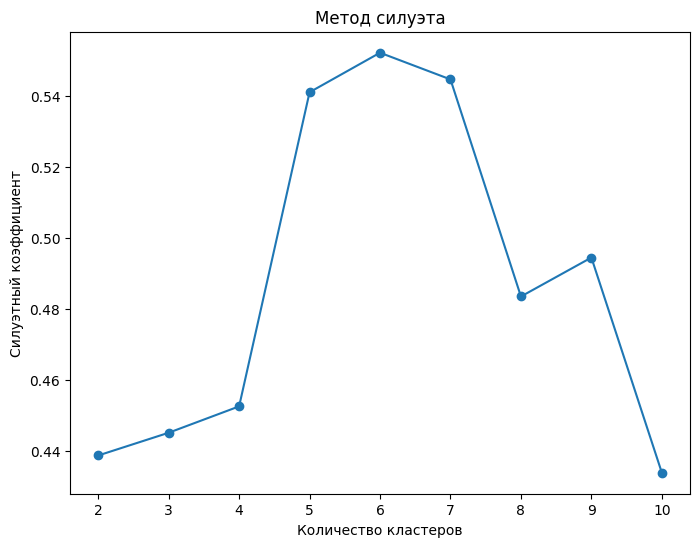

In [3]:

# Оценка качества кластеризации методом силуэта
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)

# Визуализация метода силуэта
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Количество кластеров")
plt.ylabel("Силуэтный коэффициент")
plt.title("Метод силуэта")
plt.show()


## 4. Применение KMeans с оптимальными параметрами

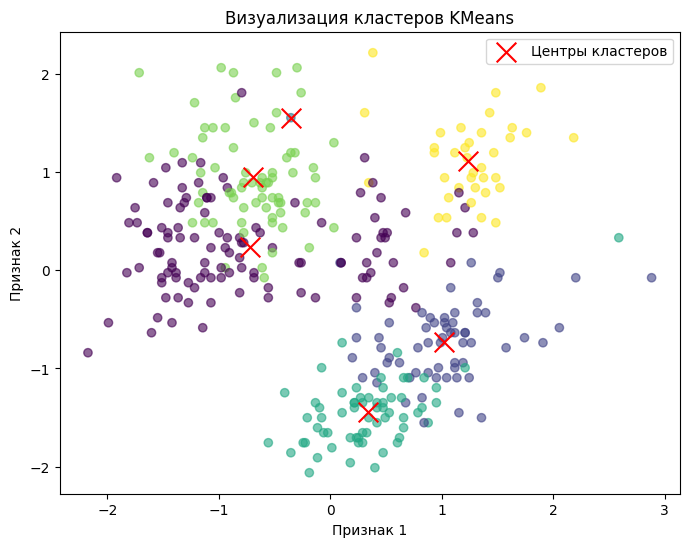

In [4]:

# Выбор оптимального числа кластеров (по методу локтя и силуэта)
optimal_k = k_values[np.argmax(silhouette_scores)]

# Обучение KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(scaled_data)

# Добавление меток кластеров в датафрейм
df['Cluster'] = labels

# Визуализация кластеров
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label="Центры кластеров")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.title("Визуализация кластеров KMeans")
plt.legend()
plt.show()


## 5. Сохранение модели KMeans

In [5]:

# Сохранение модели KMeans
joblib.dump(kmeans, "kmeans_model.joblib")


['kmeans_model.joblib']